# PCA on Iris Data Set

__Why this notebook__
To have hands-on exercise on PCA using Python

__Reference__ None. Since IRIS Dataset is easily available, chosen that to try PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt # for plotting
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler # for column standardization
from scipy.linalg import eigh # for eigen value/vector calculation

## Load Data Set

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# move labels to a seperate data frame
df_labels = df['species']
df_data = df.drop('species',axis=1)

In [5]:
df_labels.shape

(150,)

In [6]:
df_labels.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [7]:
df_data.shape

(150, 4)

In [8]:
df_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Column Standardize the Data

In [9]:
# Column Standardize the data
standardized_data = StandardScaler().fit_transform(df_data)

In [10]:
standardized_data.shape

(150, 4)

In [11]:
standardized_data[1:4]

array([[-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

## Compute Covariance Matrix

In [12]:
# Compute covariance Matrix
sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T,sample_data)
covar_matrix.shape

(4, 4)

In [13]:
covar_matrix

array([[150.        , -16.40538749, 130.7631236 , 122.69304501],
       [-16.40538749, 150.        , -63.07741446, -53.48161344],
       [130.7631236 , -63.07741446, 150.        , 144.41356456],
       [122.69304501, -53.48161344, 144.41356456, 150.        ]])

## Compute Eigen Values and Eigen Vectors

In [14]:
# calculate eignen values and eigen vectors
eigen_values, eigen_vectors = eigh(covar_matrix)

In [15]:
eigen_values.shape

(4,)

In [16]:
eigen_vectors.shape

(4, 4)

In [17]:
eigen_values

array([  3.09115609,  22.10299175, 138.18313961, 436.62271256])

In [18]:
eigen_vectors

array([[ 0.26199559,  0.72101681, -0.37231836,  0.52237162],
       [-0.12413481, -0.24203288, -0.92555649, -0.26335492],
       [-0.80115427, -0.14089226, -0.02109478,  0.58125401],
       [ 0.52354627, -0.6338014 , -0.06541577,  0.56561105]])

# 2-D Visualization

In [19]:
# Since we are going to do 2-D visualization, take last two eigen vectors having max variances
eigen_2d = eigen_vectors[:,[-1,-2]]
eigen_2d = eigen_2d.T
eigen_2d.shape

(2, 4)

In [20]:
# project data points into hyper plane
new_data_matrix = np.matmul(eigen_2d,standardized_data.T)

In [21]:
'Resultant matrix {0} x {1} = {2}'.format(eigen_2d.shape,standardized_data.T.shape,new_data_matrix.shape)

'Resultant matrix (2, 4) x (4, 150) = (2, 150)'

In [22]:
# Add label column
new_data_matrix = np.vstack((new_data_matrix, df_labels))

In [23]:
new_data_matrix.shape

(3, 150)

In [24]:
# Transpose the matrix to have data points as rows
new_data_matrix = new_data_matrix.T
new_data_matrix.shape

(150, 3)

In [25]:
new_data_matrix[:5]

array([[-2.2645417283948994, -0.5057039027737855, 'setosa'],
       [-2.086425500616159, 0.655404729369136, 'setosa'],
       [-2.367950449062526, 0.31847731084724806, 'setosa'],
       [-2.3041971611520093, 0.5753677125331942, 'setosa'],
       [-2.388777493505641, -0.6747673967025163, 'setosa']], dtype=object)

In [26]:
# Create a data frame using new data matrix for plotting
new_data_df = pd.DataFrame(data=new_data_matrix,columns=['PC1','PC2','label'])
new_data_df.head()

,PC1,PC2,label
0,-2.26454,-0.505704,setosa
1,-2.08643,0.655405,setosa
2,-2.36795,0.318477,setosa
3,-2.3042,0.575368,setosa
4,-2.38878,-0.674767,setosa


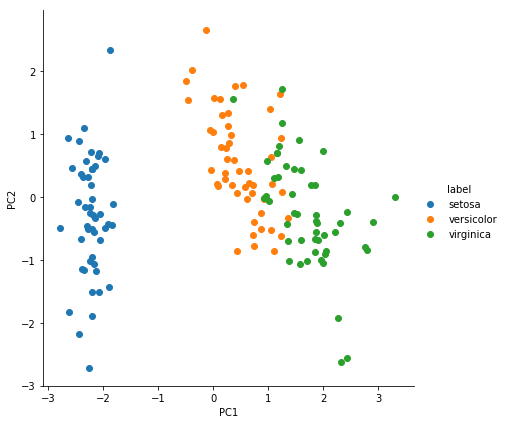

In [27]:
sns.FacetGrid(data=new_data_df,hue='label',height=6).map(plt.scatter,'PC1','PC2').add_legend()